<a href="https://colab.research.google.com/github/cs16677/ce888/blob/master/lab2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import random


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	samples = np.empty((n_iterations, sample_size))
	for i in range(0, n_iterations):
		samples[i] = random.choice(sample, sample_size)
	
	means = np.empty((n_iterations))
	for i in range(0, n_iterations):
		means[i] = np.mean(samples[i])

	data_mean = np.mean(samples)
	lower = np.percentile(means, 2.5)
	upper = np.percentile(means, 97.5)

	return data_mean, lower, upper

#print(boostrap_mean(data, data.shape[0], 50))

(0, 100000)

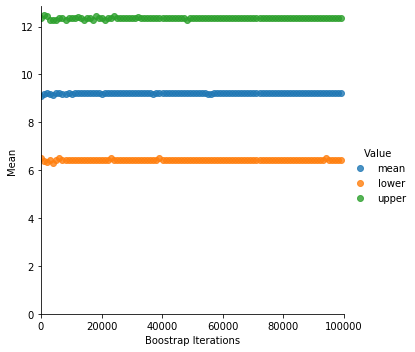

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	samples = np.empty((iterations, sample_size))
	for i in range(0, iterations):
		samples[i] = random.choice(sample, sample_size)
	
	means = np.empty((iterations))
	for i in range(0, iterations):
		means[i] = np.mean(samples[i])

	data_mean = np.mean(samples)
	n = (100 - ci) / 2
	lower = np.percentile(means, n)
	upper = np.percentile(means, ci + n)

	return data_mean, lower, upper

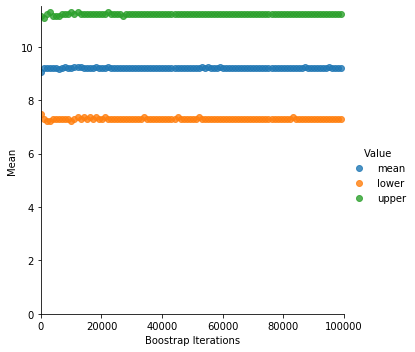

In [9]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!